In [1]:
#import libraries
import os
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import numpy as np 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.figure_factory as ff

import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score

 <font face="Times New Roman" size=5 color=#000000>
   Insight of Market Data

In [2]:
# import market data and preview the first 5  lines of data
market_data = pd.read_csv("News_score.csv")

In [3]:
#basic trend analysis
data=[]
data.append(go.Scatter(
        x = market_data['Date'].values,
        y = market_data['Adj Close'].values
    ))

layout = go.Layout(dict(title = "Closing prices SP500 Index from 2016-2018",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [4]:
plotly.tools.set_credentials_file(username='zihan23', api_key='RPFXG0jAX3vN8oluAy4v')

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = market_data

trace_close = go.Scatter(
    x=df.Date,
    y=df['Adj Close'],
    name = "Adj Close",
    line = dict(color = '#1f77b4'),
    opacity = 0.8)

trace_open = go.Scatter(
    x=df.Date,
    y=df['Open'],
    name = "Open",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

trace_high = go.Scatter(
    x=df.Date,
    y=df['High'],
    name = "High",
    line = dict(color = '#2ca02c'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df.Date,
    y=df['Low'],
    name = "Low",
    line = dict(color = '#bcbd22'),
    opacity = 0.8)

data = [trace_close,trace_open,trace_high,trace_low]

layout = dict(
    title='Compare of Open,Close, High and Low Price of SP500 Index',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Compare of Open and Close of SP500 Index")

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = market_data

trace_high = go.Box(
    x=df['Date'],
    y=df['Adj Close'],
    name = "Adj Close",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Box(
    x=df['Date'],
    y=df['Open'],
    name = "Open",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Compare of Open and Close of SP500 Index',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Compare of Open and Close of SP500 Index")

The draw time for this plot will be slow for clients without much RAM.


/usr/local/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [9]:
import pandas as pd
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import numpy as np 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.figure_factory as ff

df = pd.read_csv('News_score.csv')
trace1 = go.Bar(
    x = df['Date'].values,
    y = df['Volume'].values
)

layout = dict(title = "Trading volumes by date",
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Volume'),
              )
data = [trace1]

py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [10]:
trace1 = go.Histogram(
    x = df['Daily Growth'].values
)

layout = dict(title = "Histogram of Daily Growth by date")
data = [trace1]

py.iplot(dict(data=data, layout=layout), filename='basic-line')

 <font face="Times New Roman" size=5 color=#000000>
   Insight of News Data

In [22]:
news_df = pd.read_csv("newscleaned2.csv")
news_df.head()

,Unnamed: 0,Date,News_title,News_abstract
0,0,2016-09-26,additional skyhigh peres loss export lineup cr...,bare rescind prevent chemical include accompan...
1,1,2016-09-27,blunt restoration peres loss wealth list fisch...,version oppose loss export according list food...
2,2,2016-09-28,better lyft chemical peres loss knew robert li...,assuming chemical theatre loss export conducte...
3,3,2016-09-29,viral peres loss sound list credit pass rip la...,spurring mishandled export according transpare...
4,4,2016-09-30,peres loss reviewing list robert stance charlo...,fled version blunt persisted include peres los...


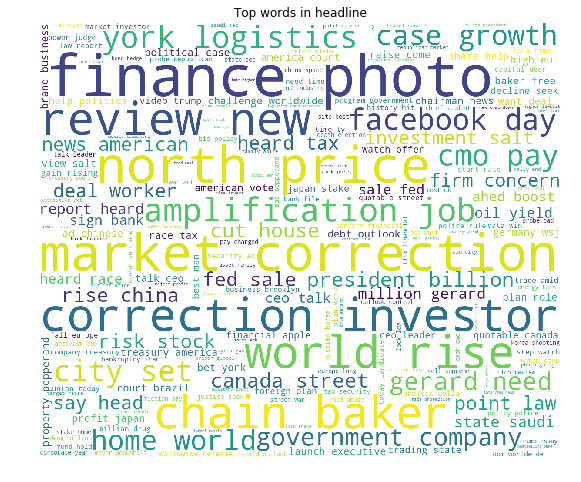

In [21]:
import matplotlib.pyplot as plt
text = ' '.join(news_df['News_title'].str.lower().values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in headline')
plt.axis("off")
plt.show()

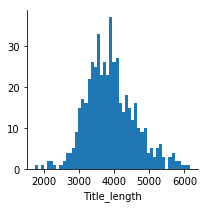

In [28]:
news_df['Title_length'] = news_df['News_title'].apply(len)
g = sns.FacetGrid(data=news_df)
g.map(plt.hist, 'Title_length', bins=50)

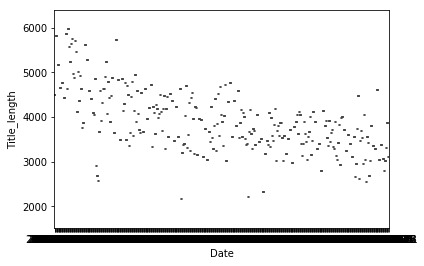

In [31]:
sns.boxplot(x='Date', y='Title_length', data=news_df)